In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('../data/mobile_addiction_dataset.csv')
print(df.head())
print(df.info())

   User_ID  Country  Age  Gender   Occupation Education_Level  Income_USD  \
0        1    India   32    Male  Salesperson     High School    43865.49   
1        2       UK   26    Male       Artist        Master's    41868.19   
2        3  Germany   70   Other       Doctor     High School    59636.51   
3        4       UK   44  Female     Engineer             NaN    39022.07   
4        5   Brazil   46   Other      Student             NaN     -783.98   

   Daily_Screen_Time_Hours  Phone_Unlocks_Per_Day  Social_Media_Usage_Hours  \
0                     5.81                     75                      0.84   
1                     9.05                     61                      3.13   
2                     5.76                     58                      2.12   
3                     6.71                     80                      1.60   
4                     6.31                    136                      1.51   

   ...  Online_Shopping_Hours  Internet_Connection_Type  Prima

In [82]:
df["Education_Level"] = df["Education_Level"].fillna("Unknown")

In [83]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 User_ID                           0
Country                           0
Age                               0
Gender                            0
Occupation                        0
Education_Level                   0
Income_USD                        0
Daily_Screen_Time_Hours           0
Phone_Unlocks_Per_Day             0
Social_Media_Usage_Hours          0
Gaming_Usage_Hours                0
Streaming_Usage_Hours             0
Messaging_Usage_Hours             0
Work_Related_Usage_Hours          0
Sleep_Hours                       0
Physical_Activity_Hours           0
Mental_Health_Score               0
Depression_Score                  0
Anxiety_Score                     0
Stress_Level                      0
Relationship_Status               0
Has_Children                      0
Urban_or_Rural                    0
Time_Spent_With_Family_Hours      0
Online_Shopping_Hours             0
Internet_Connection_Type          0
Primary_Device_Brand              0
Has_Screen_

In [84]:
#the average daily screen time per country
avg_screen_time_by_country = df.groupby("Country")["Daily_Screen_Time_Hours"].mean()
print(avg_screen_time_by_country)

Country
Brazil     5.889658
China      5.913686
Germany    5.904099
India      6.135248
Japan      5.885868
Mexico     6.125647
Nigeria    5.856580
Russia     6.087319
UK         5.992247
USA        6.058139
Name: Daily_Screen_Time_Hours, dtype: float64


In [85]:
#how frequently each self-reported addiction level appears in the data
addiction_dist = df["Self_Reported_Addiction_Level"].value_counts()
print(addiction_dist)

Self_Reported_Addiction_Level
High        764
Low         756
Severe      750
Moderate    730
Name: count, dtype: int64


In [86]:
#the average income based on education level
avg_income_by_edu = df.groupby("Education_Level")["Income_USD"].mean()
print(avg_income_by_edu)

Education_Level
Bachelor's     29160.826911
High School    30106.320596
Master's       29869.283750
PhD            29577.158443
Unknown        30127.905000
Name: Income_USD, dtype: float64


In [87]:
#total number of phone unlocks per day grouped by gender
unlocks_by_gender = df.groupby("Gender")["Phone_Unlocks_Per_Day"].sum()
print(unlocks_by_gender)

Gender
Female    76418
Male      83580
Other     79101
Name: Phone_Unlocks_Per_Day, dtype: int64


In [88]:
#the top 5 countries with the highest average social media usage time
top_social_media = df.groupby("Country")["Social_Media_Usage_Hours"].mean().nlargest(5)
print(top_social_media)

Country
Japan      2.105331
Germany    2.052544
UK         2.019114
USA        1.993470
Brazil     1.993322
Name: Social_Media_Usage_Hours, dtype: float64


In [89]:
#how addiction levels vary with different amounts of screen time
screen_vs_addiction = df.groupby("Daily_Screen_Time_Hours")["Self_Reported_Addiction_Level"].value_counts()
print(screen_vs_addiction.head())

Daily_Screen_Time_Hours  Self_Reported_Addiction_Level
-0.50                    Severe                           1
-0.47                    High                             1
-0.44                    Moderate                         1
-0.27                    Severe                           1
-0.19                    Severe                           1
Name: count, dtype: int64


In [90]:
#how many users have a screen time management app installed
screen_time_app_count = len(df[df["Has_Screen_Time_Management_App"] == "Yes"])
print(f"Users with Screen Time App: {screen_time_app_count}")

Users with Screen Time App: 1462


In [91]:
#the average mental health score for each country
mental_health_by_country = df.groupby("Country")["Mental_Health_Score"].mean()
print(mental_health_by_country)

Country
Brazil     49.327945
China      52.073584
Germany    47.113710
India      52.938865
Japan      48.431136
Mexico     50.409653
Nigeria    49.529414
Russia     47.547319
UK         51.639494
USA        51.207256
Name: Mental_Health_Score, dtype: float64


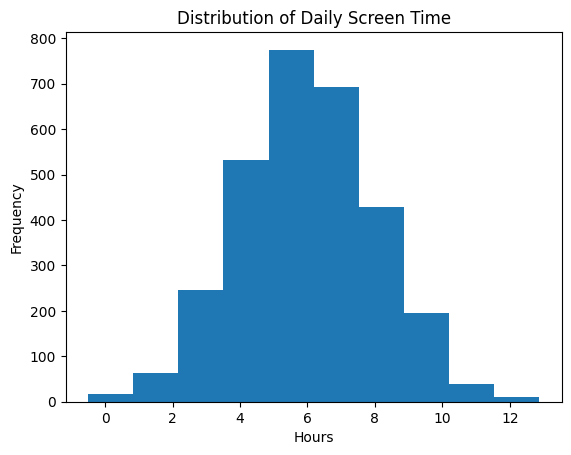

In [92]:
df["Daily_Screen_Time_Hours"].plot(kind="hist")
plt.title("Distribution of Daily Screen Time")
plt.xlabel("Hours")
plt.show()

In [93]:
#the top 5 occupations with the highest average daily screen time
top_jobs_by_screen = df.groupby("Occupation")["Daily_Screen_Time_Hours"].mean().nlargest(5)
print(top_jobs_by_screen)

Occupation
Teacher       6.077572
Manager       6.052771
Artist        6.002591
Unemployed    5.991811
Engineer      5.964560
Name: Daily_Screen_Time_Hours, dtype: float64


In [94]:
#what percentage of males use night mode on their devices
night_mode_by_gender = len(df[(df["Has_Night_Mode_On"] == "Yes") & (df["Gender"] == "Male")]) / len(df[df["Gender"] == "Male"]) * 100
print(f"Percentage of Male with Night Mode: {night_mode_by_gender:.2f}%")

Percentage of Male with Night Mode: 50.33%


In [95]:
#how addiction levels vary based on hours of physical activity
activity_vs_addiction = df.groupby("Physical_Activity_Hours")["Self_Reported_Addiction_Level"].value_counts()
print(activity_vs_addiction.head())

Physical_Activity_Hours  Self_Reported_Addiction_Level
-0.84                    Severe                           1
-0.75                    Low                              1
-0.71                    Severe                           1
-0.70                    High                             1
-0.68                    High                             1
Name: count, dtype: int64


In [96]:
#Groups people by age ranges and calculates their average income
age_bins = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60, 70])
income_by_age = df.groupby(age_bins, observed=True)["Income_USD"].mean()
print(income_by_age)

Age
(18, 30]    30250.387681
(30, 40]    28910.335403
(40, 50]    29907.119830
(50, 60]    29919.571245
(60, 70]    30498.508987
Name: Income_USD, dtype: float64


In [97]:
#how many users received their first phone before the age of 15
early_phone_count = len(df[df["Age_First_Phone"] < 15])
print(f"Users with Phone Before 15: {early_phone_count}")

Users with Phone Before 15: 1623


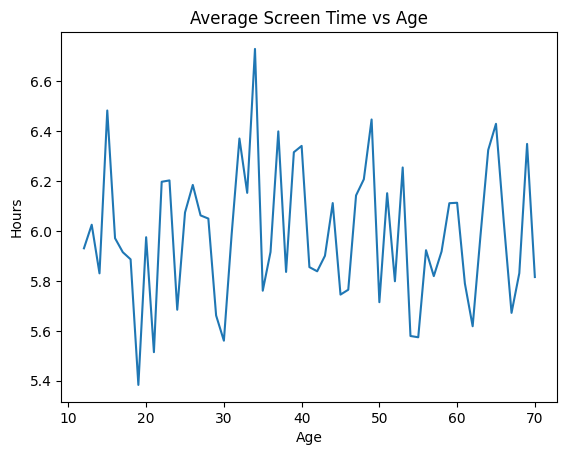

In [98]:
df.groupby("Age")["Daily_Screen_Time_Hours"].mean().plot(kind="line")
plt.title("Average Screen Time vs Age")
plt.ylabel("Hours")
plt.show()

In [99]:
#For India only: shows how push notifications per day relate to reported addiction levels
india_notif_vs_addiction = df[df["Country"] == "India"].groupby("Push_Notifications_Per_Day")["Self_Reported_Addiction_Level"].value_counts()
print(india_notif_vs_addiction.head())

Push_Notifications_Per_Day  Self_Reported_Addiction_Level
21                          Moderate                         1
24                          High                             1
26                          High                             1
28                          Severe                           1
37                          High                             1
Name: count, dtype: int64


In [100]:
#monthly data usage (GB) for each country
total_data_by_country = df.groupby("Country")["Monthly_Data_Usage_GB"].sum()
print(total_data_by_country)

Country
Brazil     7113.24
China      7267.51
Germany    7063.40
India      6979.09
Japan      8020.34
Mexico     7884.76
Nigeria    7823.32
Russia     6874.00
UK         7738.58
USA        7851.29
Name: Monthly_Data_Usage_GB, dtype: float64


In [101]:
#the top 5 users with the most streaming hours
top_streaming_users = df.nlargest(5, "Streaming_Usage_Hours")[["User_ID", "Streaming_Usage_Hours"]]
print(top_streaming_users)

      User_ID  Streaming_Usage_Hours
1781     1782                   5.18
436       437                   5.12
2913     2914                   5.00
2446     2447                   4.96
644       645                   4.95


In [102]:
#distribution of online shopping time for each education level
shopping_by_edu = df.groupby("Education_Level")["Online_Shopping_Hours"].value_counts()
print(shopping_by_edu.head())

Education_Level  Online_Shopping_Hours
Bachelor's       0.70                     11
                 1.05                     11
                 0.86                     10
                 1.14                      8
                 0.63                      7
Name: count, dtype: int64


In [103]:
#the average sleep duration for each level of self-reported addiction
sleep_by_addiction = df.groupby("Self_Reported_Addiction_Level")["Sleep_Hours"].mean()
print(sleep_by_addiction)

Self_Reported_Addiction_Level
High        6.466021
Low         6.491892
Moderate    6.494178
Severe      6.519307
Name: Sleep_Hours, dtype: float64


In [104]:
#the average social media usage between males and females
gender_vs_social = df.groupby("Gender")["Social_Media_Usage_Hours"].mean()
print(gender_vs_social)

Gender
Female    1.983853
Male      2.017545
Other     1.962263
Name: Social_Media_Usage_Hours, dtype: float64


In [105]:
#how many users are from urban vs rural areas
urban_rural_dist = df["Urban_or_Rural"].value_counts()
print(urban_rural_dist)

Urban_or_Rural
Urban    1505
Rural    1495
Name: count, dtype: int64


In [106]:
#percentage of severe addiction cases in Brazil
severe_addiction_brazil = len(df[(df["Country"] == "Brazil") & (df["Self_Reported_Addiction_Level"] == "Severe")]) / len(df[df["Country"] == "Brazil"]) * 100
print(f"Percentage of Severe Addiction in Brazil: {severe_addiction_brazil:.2f}%")

Percentage of Severe Addiction in Brazil: 26.03%


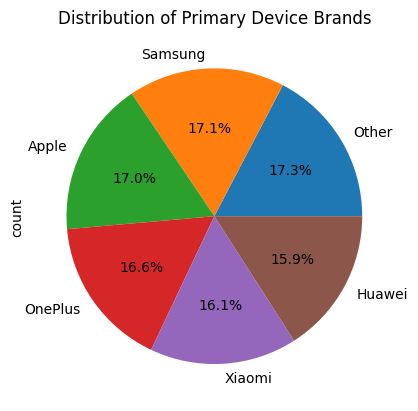

In [107]:
df["Primary_Device_Brand"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Primary Device Brands")
plt.show()

In [108]:
#the average technology savviness scores per country
tech_score_by_country = df.groupby("Country")["Tech_Savviness_Score"].mean()
print(tech_score_by_country)

Country
Brazil     50.314521
China      48.102082
Germany    49.804558
India      49.013759
Japan      49.634448
Mexico     50.632334
Nigeria    48.990749
Russia     48.908442
UK         49.481297
USA        49.559653
Name: Tech_Savviness_Score, dtype: float64


In [109]:
#the effect of internet connection type on data consumption
conn_vs_data = df.groupby("Internet_Connection_Type")["Monthly_Data_Usage_GB"].mean()
print(conn_vs_data)

Internet_Connection_Type
3G      24.229650
4G      24.941846
5G      24.922282
WiFi    25.430055
Name: Monthly_Data_Usage_GB, dtype: float64


In [110]:
#physical activity hours by age
total_activity_by_age = df.groupby("Age")["Physical_Activity_Hours"].sum()
print(total_activity_by_age.head())

Age
12    41.53
13    56.21
14    50.95
15    39.12
16    55.11
Name: Physical_Activity_Hours, dtype: float64


In [111]:
#the top 5 countries with the highest average number of daily push notifications
top_notif_countries = df.groupby("Country")["Push_Notifications_Per_Day"].mean().nlargest(5)
print(top_notif_countries)

Country
Nigeria    102.736156
Mexico     101.949527
UK         101.579114
Brazil      99.715753
USA         99.375394
Name: Push_Notifications_Per_Day, dtype: float64


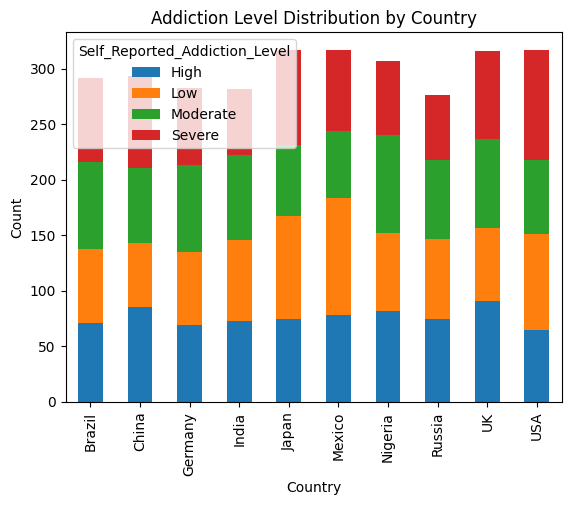

In [112]:
df.groupby(["Country", "Self_Reported_Addiction_Level"]).size().unstack().plot(kind="bar", stacked=True)
plt.title("Addiction Level Distribution by Country")
plt.ylabel("Count")
plt.show()

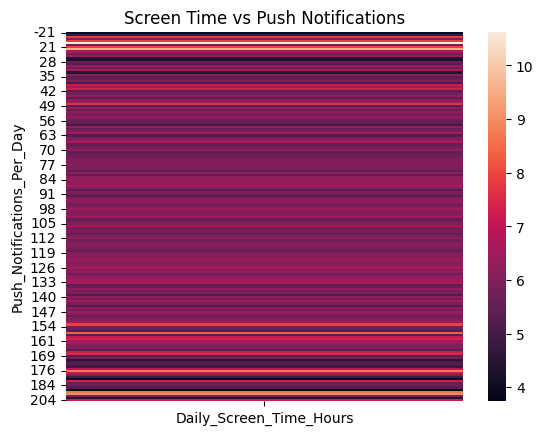

In [113]:
pivot = df.pivot_table(values="Daily_Screen_Time_Hours", index="Push_Notifications_Per_Day", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Screen Time vs Push Notifications")
plt.show()